In [15]:
!git clone https://github.com/Dinith132/steel-industry-energy-consumption.git

Cloning into 'steel-industry-energy-consumption'...
remote: Enumerating objects: 341, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 341 (delta 3), reused 5 (delta 2), pack-reused 329 (from 1)
Receiving objects: 100% (341/341), 105.78 MiB | 32.70 MiB/s, done.
Resolving deltas: 100% (112/112), done.
Updating files: 100% (179/179), done.


In [ ]:
cd steel-industry-energy-consumption/with_down/4.Eve/

/content/steel-industry-energy-consumption/with_down/eve/steel-industry-energy-consumption/with_down/eve


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import os
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout
import pickle


In [ ]:
df=pd.read_csv("../data_only_min_max.csv")

In [19]:
def create_sliding_windows(data, window_size=1):
    X, y = [], []
    for i in range(len(data)-window_size):
        X.append(data[i:i+window_size, 1:])
        y.append(data[i+window_size, 0])
    return np.array(X), np.array(y)

In [20]:
data={}
df_np = df.to_numpy()
window_sizes=[1,4,8,12,16,24,36,48,74,168,336,672]

for window in window_sizes:
  X, y = create_sliding_windows(df_np, window)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, shuffle=False)
  data[f"win{window}"] = {
      "X_train": X_train,
      "X_test": X_test,
      "y_train": y_train,
      "y_test": y_test
  }

In [21]:
data['win1']['X_train'].shape, data['win1']['y_train'].shape, data['win1']['X_test'].shape, data['win1']['y_test'].shape

((7182, 1, 8), (7182,), (1577, 1, 8), (1577,))

In [22]:
import tensorflow.keras.backend as K
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_true - y_pred)))

In [28]:
# Load model from disk
def load_saved_model(window_size):
    path = f"{model_dir}/win{window_size}.keras"
    if os.path.exists(path):
        return load_model(path, custom_objects={'rmse': rmse})
    else:
        return None


# Load history from disk
def load_saved_history(window_size):
    path = f"{history_dir}/win{window_size}_history.pkl"
    if os.path.exists(path):
        with open(path, 'rb') as f:
            return pickle.load(f)
    else:
        return None

In [ ]:
base_path = "../models/reserach/with_down/only_min_max"
single_path=f"{base_path}/single"
double_path=f"{base_path}/double"
bidir_path=f"{base_path}/bidir"

Single layer


In [30]:
model_dir = f"{single_path}/models"
history_dir = f"{single_path}/history"
os.makedirs(model_dir, exist_ok=True)
os.makedirs(history_dir, exist_ok=True)


In [31]:
single_models = {}

for window_size in window_sizes:
    print(f"==> Window: {window_size}")

    X_train = data[f"win{window_size}"]["X_train"]
    X_test = data[f"win{window_size}"]["X_test"]
    y_train = data[f"win{window_size}"]["y_train"]
    y_test = data[f"win{window_size}"]["y_test"]

    print("-->", X_train.shape, y_train.shape, X_test.shape)

    # Try to load the model
    model = load_saved_model(window_size)
    history_data = load_saved_history(window_size)

    if model is not None and history_data is not None:
        print(f"✅ Loaded model and history for window {window_size}")
        history = None  # Already loaded history_data
    else:
        if model is None:
          print(f"Failed Loading model for window {window_size}")
        elif history_data is None:
          print(f"Failed Loading history for window {window_size}")
        else:
          print(f"Failed Loading window {window_size}")


    single_models[f"win{window_size}"] = {
        "model": model,
        "history": history_data  # always a dict
    }


==> Window: 1
--> (7182, 1, 8) (7182,) (1577, 1, 8)
✅ Loaded model and history for window 1
==> Window: 4
--> (7179, 4, 8) (7179,) (1577, 4, 8)
✅ Loaded model and history for window 4
==> Window: 8
--> (7176, 8, 8) (7176,) (1576, 8, 8)
✅ Loaded model and history for window 8
==> Window: 12
--> (7173, 12, 8) (7173,) (1575, 12, 8)
✅ Loaded model and history for window 12
==> Window: 16
--> (7170, 16, 8) (7170,) (1574, 16, 8)
✅ Loaded model and history for window 16
==> Window: 24
--> (7163, 24, 8) (7163,) (1573, 24, 8)
✅ Loaded model and history for window 24
==> Window: 36
--> (7153, 36, 8) (7153,) (1571, 36, 8)
✅ Loaded model and history for window 36
==> Window: 48
--> (7143, 48, 8) (7143,) (1569, 48, 8)
✅ Loaded model and history for window 48
==> Window: 74
--> (7122, 74, 8) (7122,) (1564, 74, 8)
✅ Loaded model and history for window 74
==> Window: 168
--> (7045, 168, 8) (7045,) (1547, 168, 8)
✅ Loaded model and history for window 168
==> Window: 336
--> (6907, 336, 8) (6907,) (1517

double

In [32]:
model_dir = f"{double_path}/models"
history_dir = f"{double_path}/history"
os.makedirs(model_dir, exist_ok=True)
os.makedirs(history_dir, exist_ok=True)

In [33]:
double_models = {}

for window_size in window_sizes:
    print(f"==> Window: {window_size}")

    X_train = data[f"win{window_size}"]["X_train"]
    X_test = data[f"win{window_size}"]["X_test"]
    y_train = data[f"win{window_size}"]["y_train"]
    y_test = data[f"win{window_size}"]["y_test"]

    print("-->", X_train.shape, y_train.shape, X_test.shape)

    # Try to load the model
    model = load_saved_model(window_size)
    history_data = load_saved_history(window_size)

    if model is not None and history_data is not None:
        print(f"✅ Loaded model and history for window {window_size}")
        history = None  # Already loaded history_data
    else:
        if model is None:
          print(f"Failed Loading model for window {window_size}")
        elif history_data is None:
          print(f"Failed Loading history for window {window_size}")
        else:
          print(f"Failed Loading window {window_size}")

    double_models[f"win{window_size}"] = {
        "model": model,
        "history": history_data  # always a dict
    }


==> Window: 1
--> (7182, 1, 8) (7182,) (1577, 1, 8)
✅ Loaded model and history for window 1
==> Window: 4
--> (7179, 4, 8) (7179,) (1577, 4, 8)
✅ Loaded model and history for window 4
==> Window: 8
--> (7176, 8, 8) (7176,) (1576, 8, 8)
✅ Loaded model and history for window 8
==> Window: 12
--> (7173, 12, 8) (7173,) (1575, 12, 8)
✅ Loaded model and history for window 12
==> Window: 16
--> (7170, 16, 8) (7170,) (1574, 16, 8)
✅ Loaded model and history for window 16
==> Window: 24
--> (7163, 24, 8) (7163,) (1573, 24, 8)
✅ Loaded model and history for window 24
==> Window: 36
--> (7153, 36, 8) (7153,) (1571, 36, 8)
✅ Loaded model and history for window 36
==> Window: 48
--> (7143, 48, 8) (7143,) (1569, 48, 8)
✅ Loaded model and history for window 48
==> Window: 74
--> (7122, 74, 8) (7122,) (1564, 74, 8)
✅ Loaded model and history for window 74
==> Window: 168
--> (7045, 168, 8) (7045,) (1547, 168, 8)
✅ Loaded model and history for window 168
==> Window: 336
--> (6907, 336, 8) (6907,) (1517

bi dir

In [34]:
model_dir = f"{bidir_path}/models"
history_dir = f"{bidir_path}/history"
os.makedirs(model_dir, exist_ok=True)
os.makedirs(history_dir, exist_ok=True)

In [35]:
bidir_models = {}

for window_size in window_sizes:
    print(f"==> Window: {window_size}")

    X_train = data[f"win{window_size}"]["X_train"]
    X_test = data[f"win{window_size}"]["X_test"]
    y_train = data[f"win{window_size}"]["y_train"]
    y_test = data[f"win{window_size}"]["y_test"]

    print("-->", X_train.shape, y_train.shape, X_test.shape)

    # Try to load the model
    model = load_saved_model(window_size)
    history_data = load_saved_history(window_size)

    if model is not None and history_data is not None:
        print(f"✅ Loaded model and history for window {window_size}")
        history = None  # Already loaded history_data
    else:
        if model is None:
          print(f"Failed Loading model for window {window_size}")
        elif history_data is None:
          print(f"Failed Loading history for window {window_size}")
        else:
          print(f"Failed Loading window {window_size}")

    bidir_models[f"win{window_size}"] = {
        "model": model,
        "history": history_data  # always a dict
    }


==> Window: 1
--> (7182, 1, 8) (7182,) (1577, 1, 8)
✅ Loaded model and history for window 1
==> Window: 4
--> (7179, 4, 8) (7179,) (1577, 4, 8)
✅ Loaded model and history for window 4
==> Window: 8
--> (7176, 8, 8) (7176,) (1576, 8, 8)
✅ Loaded model and history for window 8
==> Window: 12
--> (7173, 12, 8) (7173,) (1575, 12, 8)
✅ Loaded model and history for window 12
==> Window: 16
--> (7170, 16, 8) (7170,) (1574, 16, 8)
✅ Loaded model and history for window 16
==> Window: 24
--> (7163, 24, 8) (7163,) (1573, 24, 8)
✅ Loaded model and history for window 24
==> Window: 36
--> (7153, 36, 8) (7153,) (1571, 36, 8)
✅ Loaded model and history for window 36
==> Window: 48
--> (7143, 48, 8) (7143,) (1569, 48, 8)
✅ Loaded model and history for window 48
==> Window: 74
--> (7122, 74, 8) (7122,) (1564, 74, 8)
✅ Loaded model and history for window 74
==> Window: 168
--> (7045, 168, 8) (7045,) (1547, 168, 8)
✅ Loaded model and history for window 168
==> Window: 336
--> (6907, 336, 8) (6907,) (1517

In [36]:
# import matplotlib.pyplot as plt

# for key, content in single_models.items():
#     history_data = content["history"]
#     if history_data:
#         plt.figure()
#         plt.plot(history_data['loss'], label='Train Loss')
#         if 'val_loss' in history_data:
#             plt.plot(history_data['val_loss'], label='Val Loss')
#         plt.title(f"Loss Curve for {key}")
#         plt.legend()
#         plt.show()

In [37]:
import matplotlib.pyplot as plt
import math

def plot_histories_subplot(model_histories, title_prefix, cols=3, figsize=(12, 4)):
    total = len(model_histories)
    rows = math.ceil(total / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(figsize[0], figsize[1]*rows))
    axes = axes.flatten()  # Flatten to 1D for easy indexing

    for idx, (key, content) in enumerate(model_histories.items()):
        ax = axes[idx]
        history_data = content["history"]

        if history_data:
            ax.plot(history_data['loss'], label='Train Loss')
            if 'val_loss' in history_data:
                ax.plot(history_data['val_loss'], label='Val Loss')
            ax.set_title(f"{title_prefix} - win{key}")
            ax.set_xlabel("Epoch")
            ax.set_ylabel("Loss")
            ax.legend()
            ax.grid(True)
        else:
            ax.set_title(f"No data for win{key}")
            ax.axis('off')

    # Turn off any unused subplots
    for i in range(len(model_histories), len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


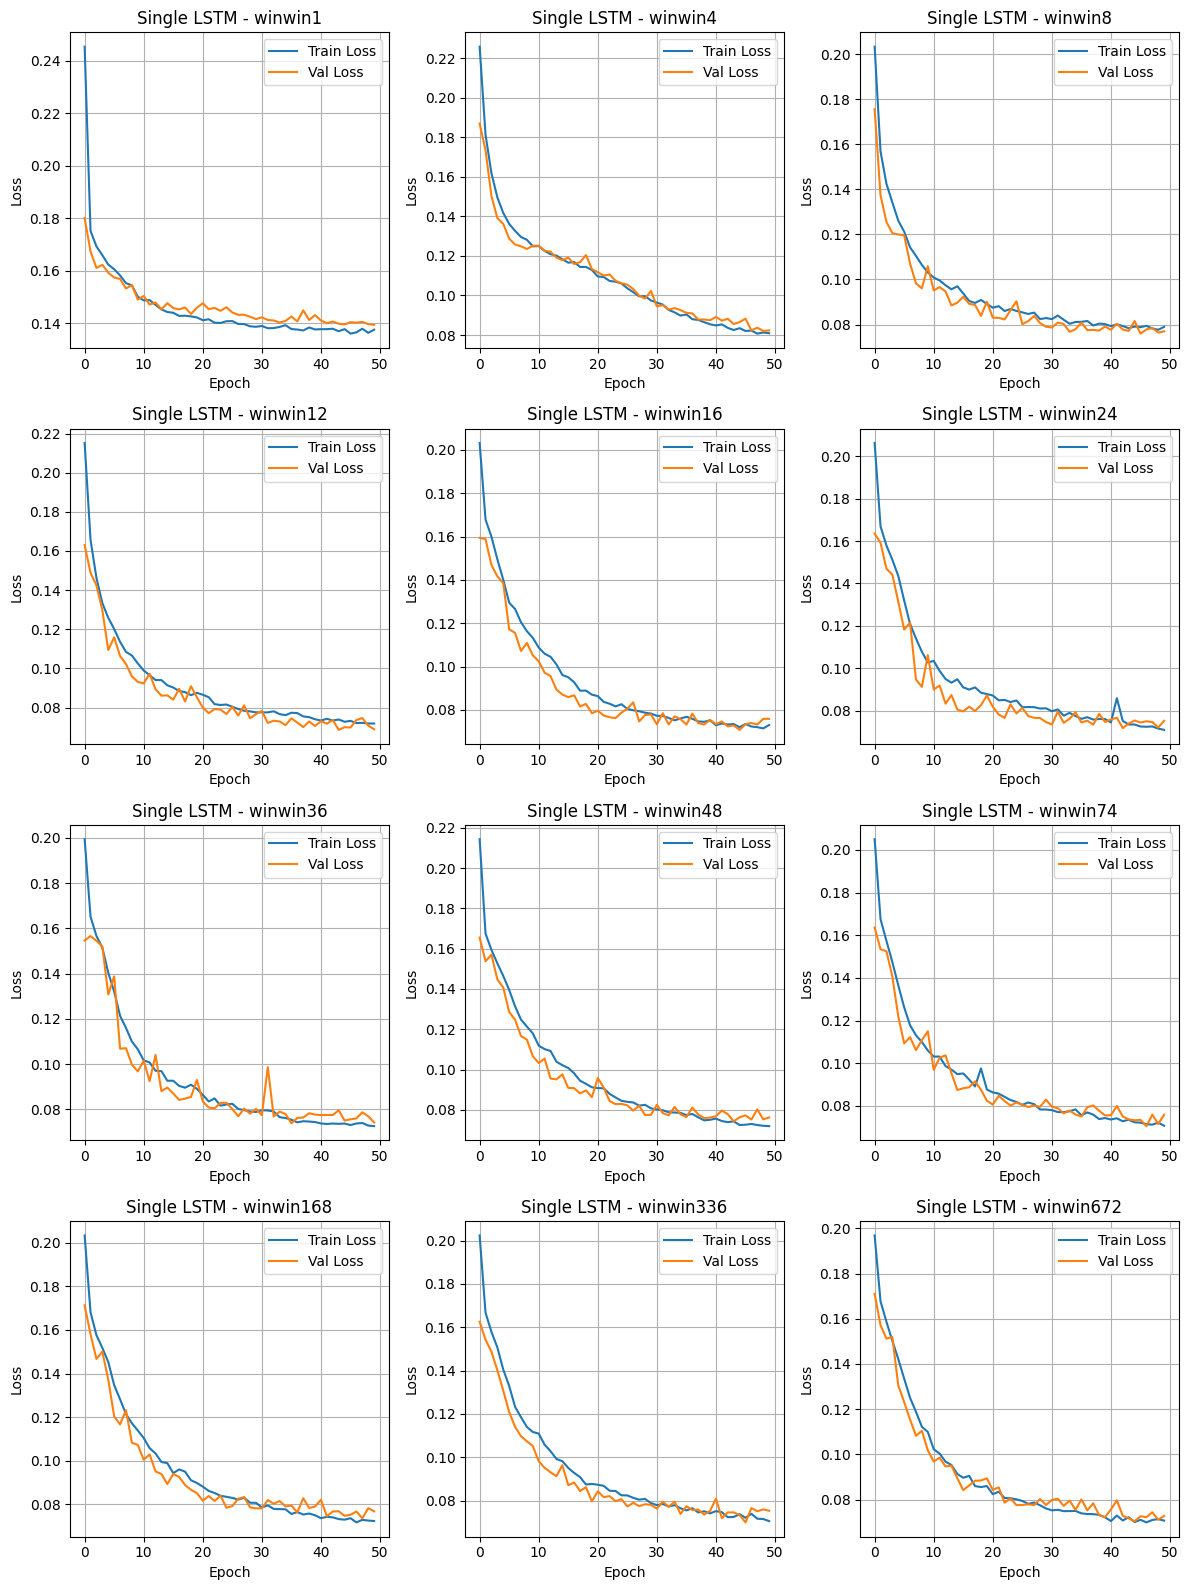

In [ ]:
plot_histories_subplot(single_models, "Single (only_min_max)")


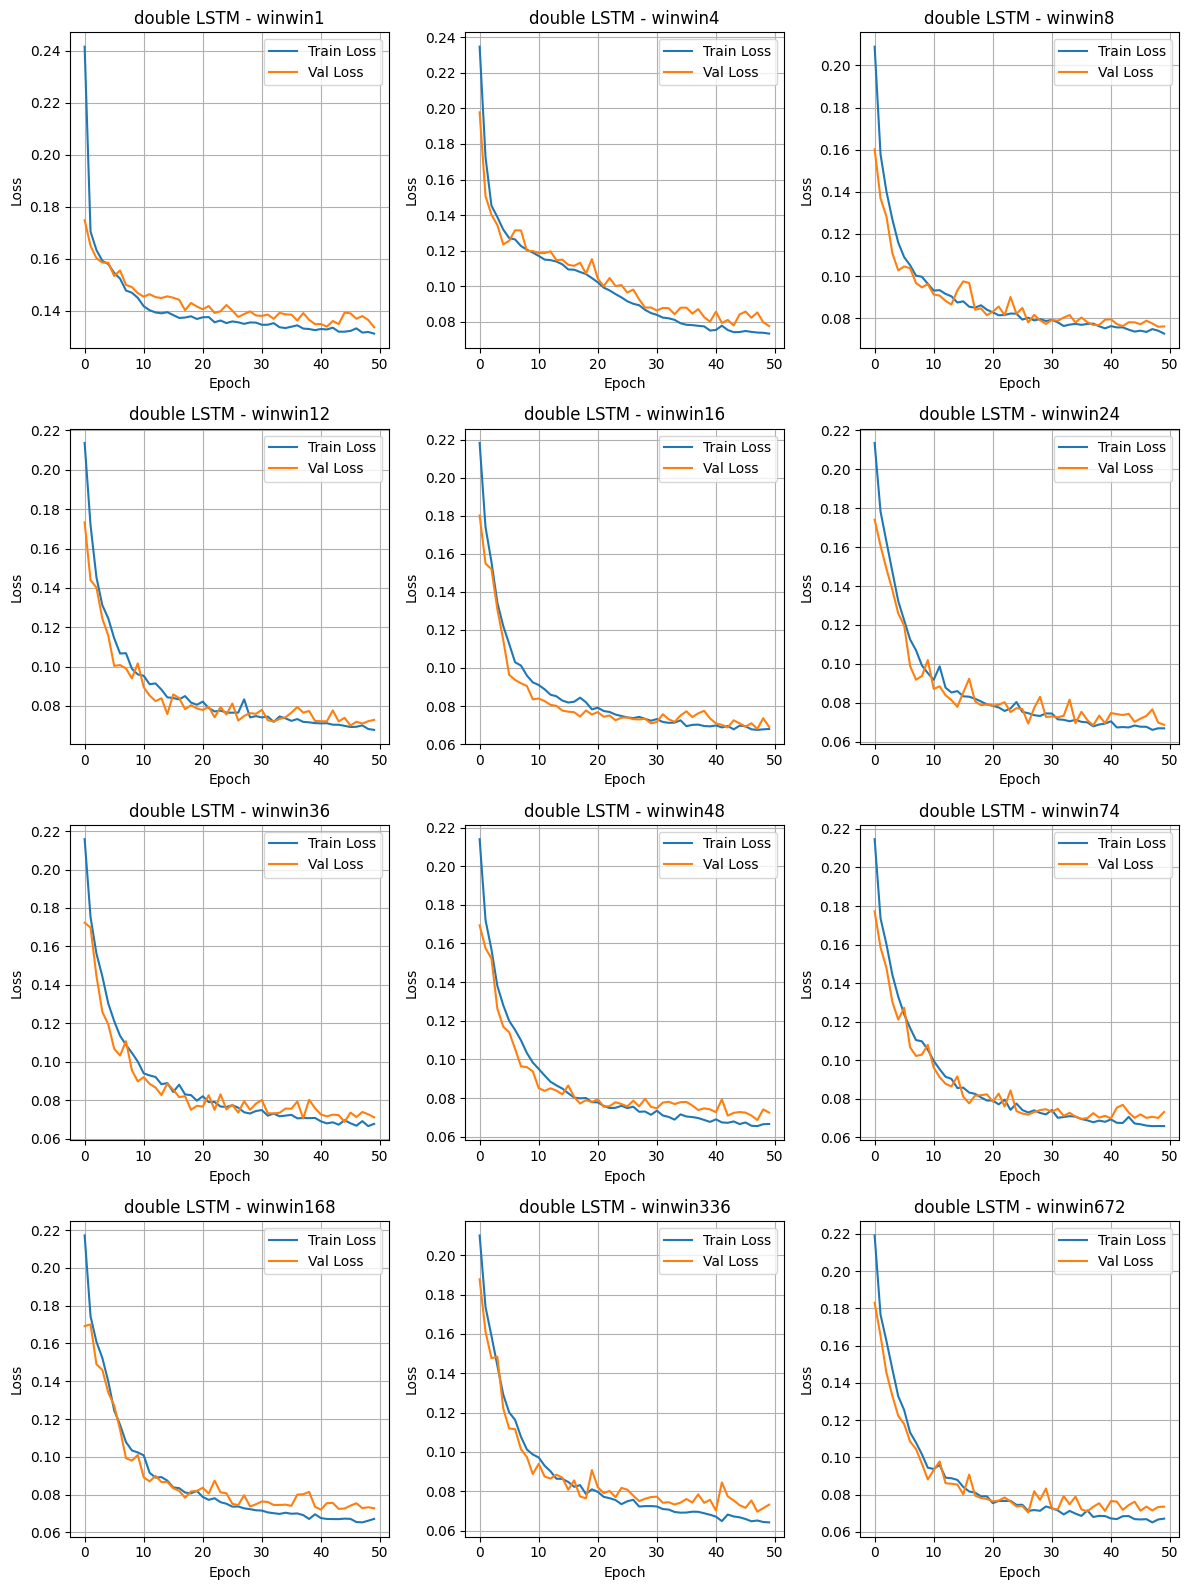

In [ ]:
plot_histories_subplot(double_models, "double (only_min_max)")

In [ ]:
plot_histories_subplot(bidir_models, "bidir (only_min_max)")

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test).flatten()
    y_test = y_test.flatten()

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return {"RMSE": rmse, "MAE": mae, "R2": r2}


In [43]:
model_groups = {
    "Single": single_models,
    "Double": double_models,
    "Bidirectional": bidir_models
}

evaluation_results = {}

for model_type, models_dict in model_groups.items():
    print(f"\n=== Evaluating {model_type} Models ===")
    evaluation_results[model_type] = {}

    for key, content in models_dict.items():
        model = content["model"]
        if model is None:
            print(f"❌ {model_type} model missing for {key}")
            continue

        X_test = data[key]["X_test"]
        y_test = data[key]["y_test"]

        metrics = evaluate_model(model, X_test, y_test)
        evaluation_results[model_type][key] = metrics

        print(f"{model_type} - {key} -> "
              f"RMSE: {metrics['RMSE']:.4f}, "
              f"MAE: {metrics['MAE']:.4f}, "
              f"R²: {metrics['R2']:.4f}")



=== Evaluating Single Models ===
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Single - win1 -> RMSE: 0.1366, MAE: 0.0916, R²: 0.8259
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Single - win4 -> RMSE: 0.0975, MAE: 0.0585, R²: 0.9113
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Single - win8 -> RMSE: 0.0906, MAE: 0.0520, R²: 0.9234
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Single - win12 -> RMSE: 0.0914, MAE: 0.0533, R²: 0.9221
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Single - win16 -> RMSE: 0.0991, MAE: 0.0590, R²: 0.9084
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Single - win24 -> RMSE: 0.0976, MAE: 0.0564, R²: 0.9112
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Single - win36 -> RMSE: 0.0928, MAE: 0.0540, R²: 0.9197
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Single - win48 -> RMSE: 0.0916, MAE: 0.0562, R²: 0.9218
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Single - win74 -> RMSE: 0.0996, MAE: 0.0652, R²: 0.9076
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Single - win168 -> RMSE: 0.0986, MAE: 0.0597, R²: 0.9095
48/48 ━━━━━━━━━

In [54]:

data_for_df = []
for model_type, results_by_window in evaluation_results.items():
    for window, metrics in results_by_window.items():
        row = {"Model Type": model_type, "Window Size": window}
        row.update(metrics)
        data_for_df.append(row)

model_order = ["Single", "Double", "Bidirectional"]
window_order = [f"win{w}" for w in window_sizes]

df_eval = pd.DataFrame(data_for_df)

# Set the correct ordering as categorical indexes
df_eval["Model Type"] = pd.Categorical(df_eval["Model Type"], categories=model_order, ordered=True)
df_eval["Window Size"] = pd.Categorical(df_eval["Window Size"], categories=window_order, ordered=True)

# Now set index and reshape, order is preserved
df_eval = df_eval.set_index(["Window Size", "Model Type"])
df_eval = df_eval.unstack(level=1)

# Optional: clean up column MultiIndex
df_eval.columns = df_eval.columns.swaplevel(0, 1)
df_eval = df_eval.sort_index(axis=1, level=0, sort_remaining=False)

# Display final table
display(df_eval)

Model Type     Single                        Double                      \
                 RMSE       MAE        R2      RMSE       MAE        R2   
Window Size                                                               
win1         0.136628  0.091650  0.825853  0.131375  0.088083  0.838987   
win4         0.097514  0.058492  0.911291  0.094524  0.054027  0.916647   
win8         0.090618  0.051984  0.923401  0.097583  0.055821  0.911174   
win12        0.091371  0.053255  0.922142  0.091952  0.052864  0.921148   
win16        0.099125  0.058974  0.908356  0.094369  0.055921  0.916941   
win24        0.097586  0.056429  0.911175  0.088973  0.051606  0.926163   
win36        0.092781  0.054024  0.919750  0.094650  0.055843  0.916485   
win48        0.091625  0.056175  0.921762  0.088534  0.052616  0.926952   
win74        0.099623  0.065234  0.907555  0.095480  0.058680  0.915085   
win168       0.098634  0.059689  0.909506  0.088113  0.051967  0.927782   
win336       0.101739  0.063604  0.903065  0.101397  0.060660  0.903716   
win672       0.102475  0.061468  0.900989  0.101503  0.055983  0.902859   

Model Type  Bidirectional                      
                     RMSE       MAE        R2  
Window Size                                    
win1             0.134710  0.087871  0.830709  
win4             0.097736  0.056962  0.910885  
win8             0.098502  0.057012  0.909492  
win12            0.090316  0.052282  0.923929  
win16            0.096634  0.054210  0.912905  
win24            0.091663  0.056991  0.921631  
win36            0.090634  0.054213  0.923422  
win48            0.099223  0.061115  0.908250  
win74            0.089433  0.057722  0.925500  
win168           0.091657  0.057105  0.921856  
win336           0.112689  0.070359  0.881076  
win672           0.095752  0.059438  0.913554

In [55]:
# Flatten MultiIndex columns into single strings like "Single_RMSE"
df_export = df_eval.copy()
df_export.columns = [f"{model}_{metric}" for model, metric in df_export.columns]


In [56]:
# Save to CSV
df_export.to_csv("model_evaluation_results.csv")
